In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('~/Desktop/Springboard/CapstoneTwo/data/final_data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 24 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Hospital overall rating                                                               3435 non-null   float64
 1   Mortality national comparison                                                         3199 non-null   float64
 2   Readmission national comparison                                                       3580 non-null   float64
 3   Patient experience national comparison                                                3229 non-null   float64
 4   Effectiveness of care national comparison                                             3144 non-null   float64
 5   Timeliness of care national comparison                                             

# Predicting Binned Hospital Overall Rating

In [3]:
df_new = df[df['Binned Hospital overall rating'].notna()]

feature_cols = ['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino', '(0, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 100]']
features = df_new[feature_cols]

features.fillna(features.mean(), inplace=True)

y = df_new['Binned Hospital overall rating']
X = features

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = MinMaxScaler((-1,1))
X_train[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']] = scaler_x.fit_transform(X_train[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']])
X_test[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']] = scaler_x.transform(X_test[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Logistic Regression:

In [5]:
from sklearn.linear_model import LogisticRegression

Logreg = LogisticRegression(random_state=42)
Logreg.fit(X_train,y_train)
    
y_pred_lr = Logreg.predict(X_test)

In [6]:
cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[268 114]
 [126 179]]
0.6506550218340611


In [7]:
cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.65084096 0.63934426 0.67709232 0.6958585  0.70319241]
Mean cross validation test score: 0.6732656903062424
Mean cross validation train score: 0.674898986924122
Standard deviation in cv test scores: 0.024796040749333018


Random Forest:

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)

In [9]:
cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[285  97]
 [157 148]]
0.6302765647743813


In [10]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.64583777 0.62923142 0.62877481 0.62133305 0.66619931]
Mean cross validation test score: 0.6382752708895936
Mean cross validation train score: 0.6554574223884098
Standard deviation in cv scores: 0.016099890127975323


Gradient Boosting:

In [11]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

y_predict_gbc = gbc.predict(X_test)

In [12]:
cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[285  97]
 [154 151]]
0.6346433770014556


In [13]:
cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.65211837 0.65041516 0.64257981 0.62791199 0.67924935]
Mean cross validation test score: 0.650454937642168
Mean cross validation train score: 0.6612468741186663
Standard deviation in cv scores: 0.016745679632374583


Hyperparameter Tuning:

Logistic Regression Grid Search:

In [14]:
Logreg = LogisticRegression(random_state=42)

param_grid = { "penalty" : ['l1', 'l2'], "C" : np.logspace(-4, 4, 50)}

gs = GridSearchCV(estimator=Logreg, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

LogisticRegression(C=0.18420699693267145, random_state=42)
0.6426491994177584


In [15]:
Logreg = LogisticRegression(C=0.18420699693267145, random_state=42)

Logreg.fit(X_train, y_train)
y_predictions_lr = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_lr)
cv = cross_val_score(Logreg, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.6302765647743813
0.6725709579462815


Gradient Boosting Grid Search:

In [16]:
GB = GradientBoostingClassifier(random_state=42)
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   24.0s finished


GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features=0.3,
                           min_samples_leaf=150, n_estimators=300,
                           random_state=42)
0.6564774381368267


In [17]:
GB = GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features=0.3,
                           min_samples_leaf=150, n_estimators=300,
                           random_state=42)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.6346433770014556
0.6706209450601168


                                      Features  Importance scores
0                      Median Household Income       0.000000e+00
1   % of 25+ with High School Degree or Higher       0.000000e+00
2      % of 25+ with Bachelor Degree or Higher       4.455808e-09
3                                   Median Age       2.441144e-03
4                                         %65+       3.627869e-03
5                                       %White       4.193362e-02
6                                       %Black       4.542240e-02
7                             %Hispanic/Latino       7.368342e-02
8                                      (0, 30]       9.040706e-02
9                                     (30, 40]       9.687363e-02
10                                    (40, 50]       1.846302e-01
11                                    (50, 60]       2.195448e-01
12                                   (60, 100]       2.414358e-01


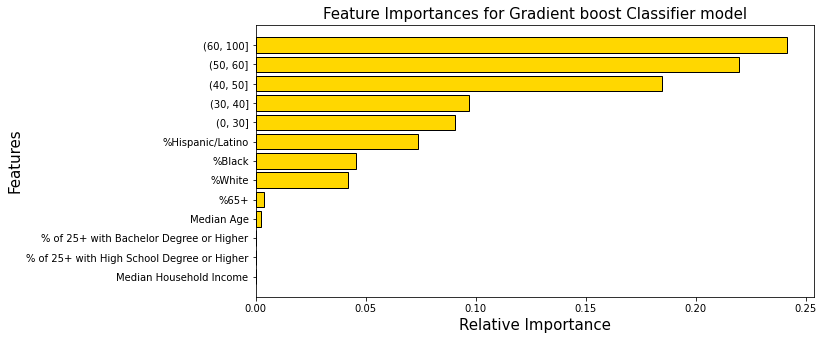

In [18]:
import matplotlib.pyplot as plt

features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient boost Classifier model',fontsize=15)
plt.show()

In [19]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = GB.predict_proba(X_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.6907432838382972


Random Forest Grid Search:

In [20]:
rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(min_samples_leaf=10, n_estimators=1000, n_jobs=-1,
                       random_state=1)
0.6495633187772926


In [21]:
rf = RandomForestClassifier(min_samples_leaf=10, n_estimators=1000, n_jobs=-1,
                       random_state=1) 
rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.636098981077147
0.6633971291866029


                                      Features  Importance scores
0                      Median Household Income           0.000770
1   % of 25+ with High School Degree or Higher           0.002559
2      % of 25+ with Bachelor Degree or Higher           0.002739
3                                   Median Age           0.006817
4                                         %65+           0.006938
5                                       %White           0.098145
6                                       %Black           0.109945
7                             %Hispanic/Latino           0.116246
8                                      (0, 30]           0.116995
9                                     (30, 40]           0.121133
10                                    (40, 50]           0.124306
11                                    (50, 60]           0.133202
12                                   (60, 100]           0.160206


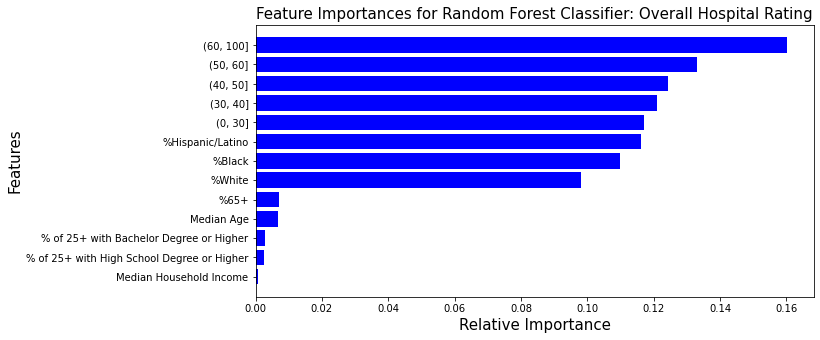

In [68]:
features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest Classifier: Overall Hospital Rating',fontsize=15)
plt.show()

In [23]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.6914041713157668


# Predicting Patient Experience National Comparison

In [24]:
df_new = df[df['Binned Patient Experience'].notna()]

feature_cols = ['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino', '(0, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 100]']
features = df_new[feature_cols]

features.fillna(features.mean(), inplace=True)

y = df_new['Binned Patient Experience']
X = features

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = MinMaxScaler((-1,1))
X_train[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']] = scaler_x.fit_transform(X_train[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']])
X_test[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']] = scaler_x.transform(X_test[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Logistic Regression:

In [26]:
Logreg = LogisticRegression(random_state=42)
Logreg.fit(X_train,y_train)
    
y_pred_lr = Logreg.predict(X_test)

In [27]:
cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[391  47]
 [148  60]]
0.6981424148606811


In [28]:
cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.66179654 0.6962306  0.64966741 0.6483306  0.64846743]
Mean cross validation test score: 0.6608985141575554
Mean cross validation train score: 0.6991823395103548
Standard deviation in cv test scores: 0.01837272308564701


Random Forest:

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)

In [30]:
cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[362  76]
 [119  89]]
0.6981424148606811


In [31]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.66991342 0.67142461 0.65521064 0.67788725 0.57471264]
Mean cross validation test score: 0.6498297130866517
Mean cross validation train score: 0.6921474030995164
Standard deviation in cv scores: 0.03828432750431466


Gradient Boosting:

In [32]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

y_predict_gbc = gbc.predict(X_test)

In [33]:
cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[370  68]
 [126  82]]
0.6996904024767802


In [34]:
cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.63528139 0.62361419 0.58841463 0.66119321 0.59209086]
Mean cross validation test score: 0.6201188564729355
Mean cross validation train score: 0.6956026702017202
Standard deviation in cv scores: 0.027276175448598016


Hyperparameter Tuning:

Logistic Regression Grid Search:

In [35]:
Logreg = LogisticRegression(random_state=42)

param_grid = { "penalty" : ['l1', 'l2'], "C" : np.logspace(-4, 4, 50)}

gs = GridSearchCV(estimator=Logreg, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

LogisticRegression(C=0.3906939937054613, random_state=42)
0.6713124274099883


In [36]:
Logreg = LogisticRegression(C=0.3906939937054613, random_state=42)

Logreg.fit(X_train, y_train)
y_predictions_lr = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_lr)
cv = cross_val_score(Logreg, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.6981424148606811
0.667372860528874


Gradient Boosting Grid Search:

In [37]:
GB = GradientBoostingClassifier(random_state=42)
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   23.4s finished


GradientBoostingClassifier(max_depth=8, max_features=0.1, min_samples_leaf=150,
                           n_estimators=300, random_state=42)
0.6945412311265969


In [38]:
GB = GradientBoostingClassifier(max_depth=8, max_features=0.1, min_samples_leaf=150,
                           n_estimators=300, random_state=42)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.6996904024767802
0.667516341475551


                                      Features  Importance scores
0                      Median Household Income           0.000000
1   % of 25+ with High School Degree or Higher           0.000477
2      % of 25+ with Bachelor Degree or Higher           0.000478
3                                   Median Age           0.003537
4                                         %65+           0.005587
5                                       %White           0.056518
6                                       %Black           0.084082
7                             %Hispanic/Latino           0.087396
8                                      (0, 30]           0.089108
9                                     (30, 40]           0.113085
10                                    (40, 50]           0.122436
11                                    (50, 60]           0.159835
12                                   (60, 100]           0.277461


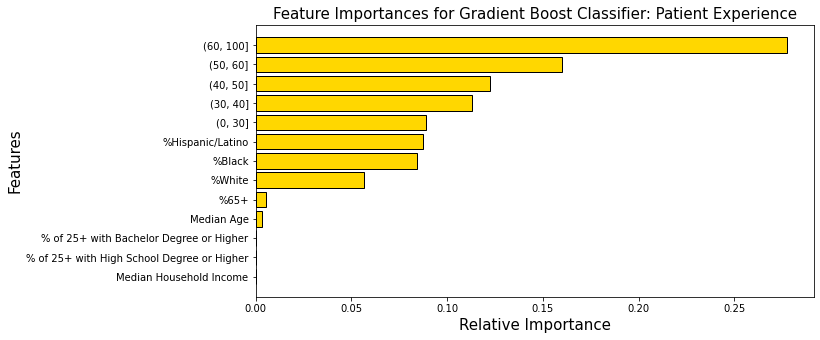

In [67]:
features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient Boost Classifier: Patient Experience',fontsize=15)
plt.show()

In [40]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = GB.predict_proba(X_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.6821873902353355


Random Forest Grid Search:

In [41]:
rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(criterion='entropy', min_samples_split=12,
                       n_estimators=700, n_jobs=-1, random_state=1)
0.6929926442121565


In [42]:
rf = RandomForestClassifier(criterion='entropy', min_samples_split=12,
                       n_estimators=700, n_jobs=-1, random_state=1)

rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.6888544891640866
0.668606390105549


                                      Features  Importance scores
0                      Median Household Income           0.001836
1   % of 25+ with High School Degree or Higher           0.002609
2      % of 25+ with Bachelor Degree or Higher           0.003589
3                                   Median Age           0.006555
4                                         %65+           0.006735
5                                       %White           0.105269
6                                       %Black           0.108597
7                             %Hispanic/Latino           0.116932
8                                      (0, 30]           0.117414
9                                     (30, 40]           0.123185
10                                    (40, 50]           0.123626
11                                    (50, 60]           0.139606
12                                   (60, 100]           0.144047


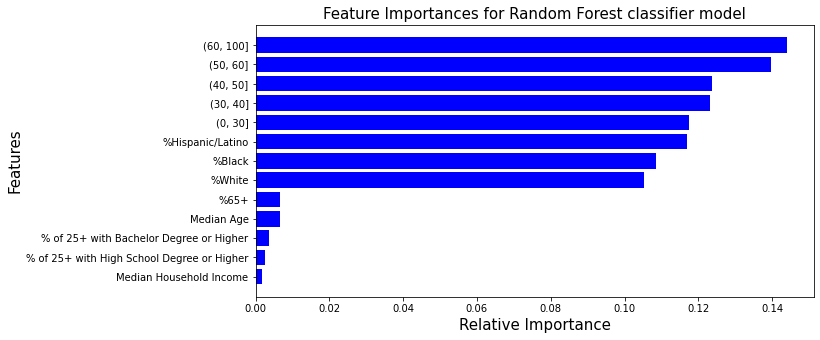

In [43]:
features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.show()

In [44]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.6767101334738321


# Predicting Timeliness of Care National Comparison

In [45]:
df_new = df[df['Binned Timeliness of Care'].notna()]

feature_cols = ['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino', '(0, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 100]']
features = df_new[feature_cols]

features.fillna(features.mean(), inplace=True)

y = df_new['Binned Timeliness of Care']
X = features

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = MinMaxScaler((-1,1))
X_train[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']] = scaler_x.fit_transform(X_train[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']])
X_test[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']] = scaler_x.transform(X_test[['Median Household Income', '% of 25+ with High School Degree or Higher', '% of 25+ with Bachelor Degree or Higher', 'Median Age', '%65+', '%White', '%Black', '%Hispanic/Latino']])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Logistic Regression:

In [47]:
Logreg = LogisticRegression(random_state=42)
Logreg.fit(X_train,y_train)
    
y_pred_lr = Logreg.predict(X_test)

In [48]:
cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[406  88]
 [146 103]]
0.6850605652759085


In [49]:
cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.64464646 0.75676768 0.69434343 0.69020408 0.72314987]
Mean cross validation test score: 0.7018223046794475
Mean cross validation train score: 0.7275751391006653
Standard deviation in cv test scores: 0.03723936647645885


Random Forest:

In [50]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)

In [51]:
cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[412  82]
 [142 107]]
0.6985195154777928


In [52]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.66525253 0.72282828 0.70767677 0.6777551  0.77685013]
Mean cross validation test score: 0.7100725623582765
Mean cross validation train score: 0.741582936667717
Standard deviation in cv scores: 0.03919425028706595


Gradient Boosting:

In [53]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

y_predict_gbc = gbc.predict(X_test)

In [54]:
cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[415  79]
 [141 108]]
0.7039030955585465


In [55]:
cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.63959596 0.67636364 0.73737374 0.7077551  0.70789528]
Mean cross validation test score: 0.6937967429396
Mean cross validation train score: 0.7440627988222703
Standard deviation in cv scores: 0.03326919620562703


Hyperparameter Tuning:

Logistic Regression Grid Search:

In [56]:
Logreg = LogisticRegression(random_state=42)

param_grid = { "penalty" : ['l1', 'l2'], "C" : np.logspace(-4, 4, 50)}

gs = GridSearchCV(estimator=Logreg, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

LogisticRegression(C=0.18420699693267145, random_state=42)
0.6896706724153748


In [57]:
Logreg = LogisticRegression(C=0.18420699693267145, random_state=42)

Logreg.fit(X_train, y_train)
y_predictions_lr = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_lr)
cv = cross_val_score(Logreg, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.6985195154777928
0.7025635951350238


Gradient Boosting Grid Search:

In [58]:
GB = GradientBoostingClassifier(random_state=42)
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   38.5s finished


GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features=0.3,
                           min_samples_leaf=100, n_estimators=300,
                           random_state=42)
0.7078480737411109


In [59]:
GB = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features=0.3,
                           min_samples_leaf=100, n_estimators=300,
                           random_state=42)

GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.7052489905787349
0.7127631416202844


                                      Features  Importance scores
0                      Median Household Income           0.000000
1   % of 25+ with High School Degree or Higher           0.000477
2      % of 25+ with Bachelor Degree or Higher           0.000478
3                                   Median Age           0.003537
4                                         %65+           0.005587
5                                       %White           0.056518
6                                       %Black           0.084082
7                             %Hispanic/Latino           0.087396
8                                      (0, 30]           0.089108
9                                     (30, 40]           0.113085
10                                    (40, 50]           0.122436
11                                    (50, 60]           0.159835
12                                   (60, 100]           0.277461


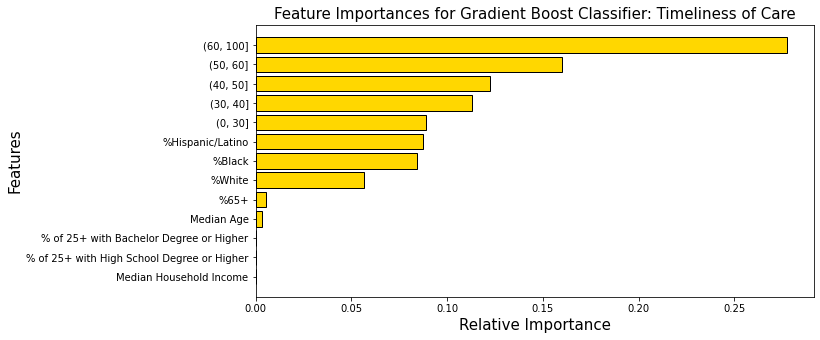

In [66]:
features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient Boost Classifier: Timeliness of Care',fontsize=15)
plt.show()

In [61]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = GB.predict_proba(X_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7332528494544981


Random Forest Grid Search:

In [62]:
rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(min_samples_split=4, n_jobs=-1, random_state=1)
0.7081796777054093


In [63]:
rf = RandomForestClassifier(min_samples_split=4, n_jobs=-1, random_state=1)

rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.6890982503364738
0.7124081632653061


                                      Features  Importance scores
0                      Median Household Income           0.000770
1   % of 25+ with High School Degree or Higher           0.002559
2      % of 25+ with Bachelor Degree or Higher           0.002739
3                                   Median Age           0.006817
4                                         %65+           0.006938
5                                       %White           0.098145
6                                       %Black           0.109945
7                             %Hispanic/Latino           0.116246
8                                      (0, 30]           0.116995
9                                     (30, 40]           0.121133
10                                    (40, 50]           0.124306
11                                    (50, 60]           0.133202
12                                   (60, 100]           0.160206


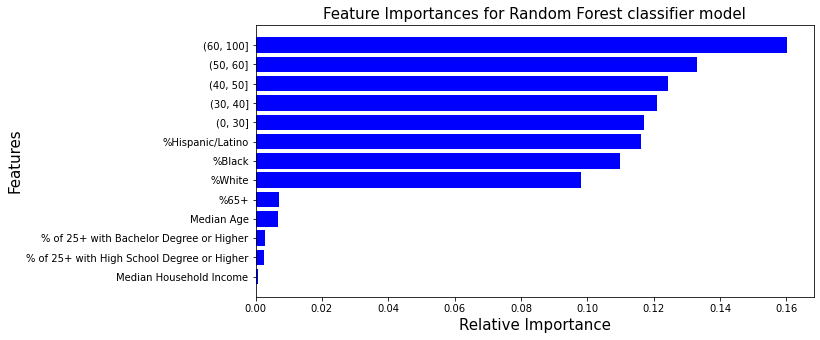

In [64]:
features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.show()

In [65]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.724838625758093


Conclusion:

We have attempted to predict three different dependent variables (Overall Hospital Rating, Patient Experience National Comparison, and Timeliness of Care National Comparison) using 13 features obtained from census data of the zip code in which a hospital is located. We binned each of these three dependent variables into two classes: Above Average and Average/Below Average.

We then used three different classification models for each dependent variable: Logistic Regression, Gradient Boosting, and Random Forest. Hyperparamter tuning was done using grid search CV. We evaluated each of the models using ROC-AUC scores, and also looked at the feature importances of the Gradient Boosting and Random Forest models. The model with the highest ROC-AUC score for each dependent variable:

Overall Hospital Rating: RF, 0.691

Patient Experience National Comparison: GB, .682 

Timeliness of Care National Comparison: GB, 0.733